In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
london_weekdays = pd.read_csv('london_weekdays.csv')
london_weekends = pd.read_csv('london_weekends.csv')

print(f"Shape of london_weekdays: {london_weekdays.shape}")
print(f"Shape of london_weekends: {london_weekends.shape}")

Shape of london_weekdays: (4614, 20)
Shape of london_weekends: (5379, 20)


In [4]:
london_weekdays['week Type'] = 'weekdays'
london_weekends['week Type'] = 'weekend'

In [5]:
# Concatenate the datasets
londonDf = pd.concat([london_weekdays, london_weekends]).copy()

In [6]:
# Drop the initial index column
londonDf.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
# Check for missing values
print(londonDf.isnull().sum())

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
week Type                     0
dtype: int64


In [8]:
londonDf

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week Type
0,570.098074,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531,weekdays
1,297.984430,Private room,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343,weekdays
2,336.790611,Private room,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407,weekdays
3,226.722171,Private room,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292,weekdays
4,256.355982,Private room,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,1035.066676,Private room,False,True,2.0,False,0,1,10.0,100.0,0,5.155373,0.883829,271.191201,18.851558,528.042180,9.451035,-0.05357,51.51255,weekend
5375,181.095510,Private room,False,True,2.0,False,1,0,10.0,100.0,1,5.072177,0.344055,268.165870,18.641255,554.906232,9.931855,-0.05620,51.51823,weekend
5376,420.517886,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,6.709982,0.926188,181.892001,12.644022,395.397885,7.076933,-0.22172,51.52180,weekend
5377,217.314612,Private room,False,True,2.0,False,0,0,10.0,94.0,1,6.736940,0.353634,184.278328,12.809905,471.029678,8.430610,-0.22286,51.49715,weekend


In [9]:
londonDf = londonDf.drop(['room_shared', 'room_private', 'multi', 
             'biz', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 
              'lng', 'lat'], axis=1)

In [10]:
londonDf.head()

,realSum,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,week Type
0,570.098074,Entire home/apt,2.0,False,10.0,98.0,1,5.301018,1.588990,weekdays
1,297.984430,Private room,2.0,True,10.0,99.0,1,2.198946,0.379262,weekdays
2,336.790611,Private room,2.0,False,10.0,96.0,1,2.322958,0.453178,weekdays
3,226.722171,Private room,2.0,True,10.0,99.0,1,5.707825,1.723977,weekdays
4,256.355982,Private room,3.0,False,9.0,98.0,1,3.257945,0.825417,weekdays


In [12]:
londonDf = pd.get_dummies(londonDf, columns=['room_type', 'host_is_superhost', 'week Type'])

In [13]:
londonDf.head()

,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_is_superhost_False,host_is_superhost_True,week Type_weekdays,week Type_weekend
0,570.098074,2.0,10.0,98.0,1,5.301018,1.588990,1,0,0,1,0,1,0
1,297.984430,2.0,10.0,99.0,1,2.198946,0.379262,0,1,0,0,1,1,0
2,336.790611,2.0,10.0,96.0,1,2.322958,0.453178,0,1,0,1,0,1,0
3,226.722171,2.0,10.0,99.0,1,5.707825,1.723977,0,1,0,0,1,1,0
4,256.355982,3.0,9.0,98.0,1,3.257945,0.825417,0,1,0,1,0,1,0


In [14]:
londonDf = londonDf.rename(columns={'realSum': 'Price'})
londonDf = londonDf.rename(columns={'person_capacity': 'Person_Capacity'})
londonDf = londonDf.rename(columns={'cleanliness_rating': 'Cleanliness_Rating'})
londonDf = londonDf.rename(columns={'guest_satisfaction_overall': 'Satisfaction'})
londonDf = londonDf.rename(columns={'bedrooms': 'Bedrooms'})
londonDf = londonDf.rename(columns={'dist': 'Dist'})
londonDf = londonDf.rename(columns={'metro_dist': 'Metro Dist'})
londonDf = londonDf.rename(columns={'room_type_Entire home/apt': 'Entire home/apt'})
londonDf = londonDf.rename(columns={'room_type_Private room' : 'Private room'})
londonDf = londonDf.rename(columns={'room_type_Shared room' : 'Shared room'})
londonDf = londonDf.rename(columns={'host_is_superhost_False' : 'Superhost_False'})
londonDf = londonDf.rename(columns={'host_is_superhost_True' : 'Superhost_True'})
londonDf = londonDf.rename(columns={'week Type_weekdays' : 'Weekdays'})
londonDf = londonDf.rename(columns={'week Type_weekend' : 'Weekend'})

In [16]:
londonDf.head()

,Price,Person_Capacity,Cleanliness_Rating,Satisfaction,Bedrooms,Dist,Metro Dist,Entire home/apt,Private room,Shared room,Superhost_False,Superhost_True,Weekdays,Weekend
0,570.098074,2.0,10.0,98.0,1,5.301018,1.588990,1,0,0,1,0,1,0
1,297.984430,2.0,10.0,99.0,1,2.198946,0.379262,0,1,0,0,1,1,0
2,336.790611,2.0,10.0,96.0,1,2.322958,0.453178,0,1,0,1,0,1,0
3,226.722171,2.0,10.0,99.0,1,5.707825,1.723977,0,1,0,0,1,1,0
4,256.355982,3.0,9.0,98.0,1,3.257945,0.825417,0,1,0,1,0,1,0


               Feature       F-test        p-value
0      Person_Capacity  1417.085111  3.935285e-290
6      Entire home/apt  1321.682711  6.723307e-272
7         Private room  1284.301626  1.032301e-264
3             Bedrooms  1077.502806  1.614786e-224
4                 Dist   496.183026  2.564745e-107
5           Metro Dist   232.880497   5.401618e-52
8          Shared room     7.550309   6.010740e-03
1   Cleanliness_Rating     2.161422   1.415452e-01
9      Superhost_False     2.038105   1.534319e-01
10      Superhost_True     2.038105   1.534319e-01
12             Weekend     0.193379   6.601287e-01
11            Weekdays     0.193379   6.601287e-01
2         Satisfaction     0.160220   6.889631e-01


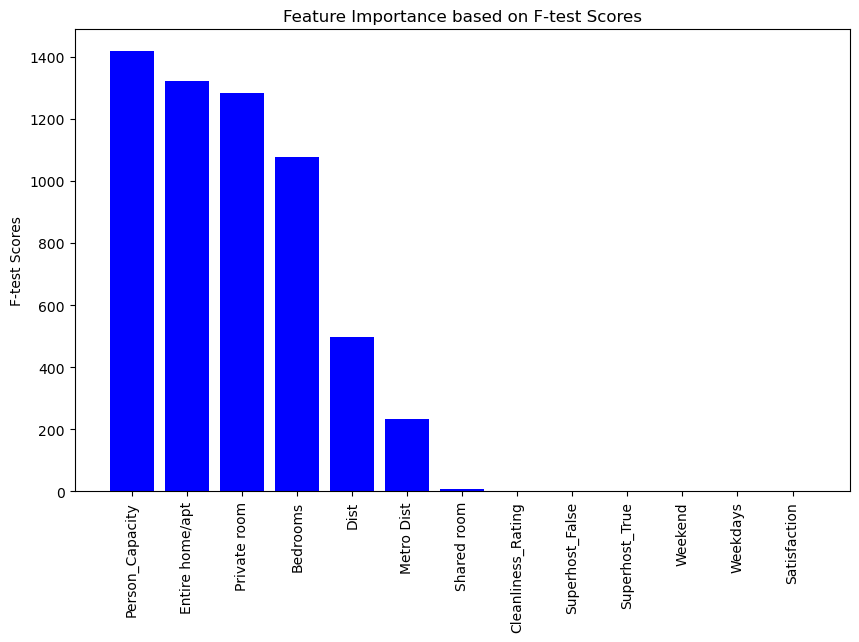

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.feature_selection import f_regression

# Assuming your data is stored in a pandas DataFrame named 'data'
# Extract the features and the target variable
X = londonDf.drop('Price', axis=1)
y = londonDf['Price']

# Compute the F-test and the p-values for the features
f_values, p_values = f_regression(X, y)

# Create a DataFrame to store feature names, F-test scores, and p-values
feature_importance = pd.DataFrame({'Feature': X.columns, 'F-test': f_values, 'p-value': p_values})

# Sort the features based on F-test scores in descending order
feature_importance.sort_values(by='F-test', ascending=False, inplace=True)

# Print the feature ranking
print(feature_importance)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['F-test'], color='b', align='center')
plt.xlabel('')
plt.ylabel('F-test Scores')
plt.title('Feature Importance based on F-test Scores')
plt.xticks(rotation=90)
plt.show()

Linear Regression. 

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define your feature matrix and target variable
X = londonDf[['Person_Capacity','Entire home/apt', 'Private room', 'Bedrooms', 'Dist', 'Metro Dist']] 
y = londonDf['Price'] 

Mean Squared Error (test set): 0.04168089061274856
R-squared (test set): 0.9999701457341349


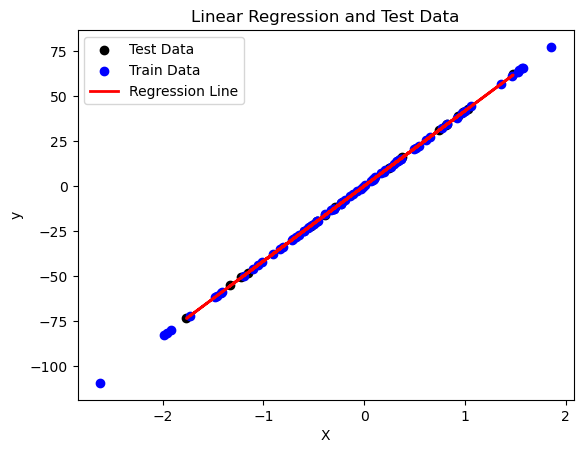

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=1, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]

    # Train the model on the training fold
    model.fit(X_train_kf, y_train_kf)

    # Predict on the validation fold
    y_pred_kf = model.predict(X_val_kf)

    # Calculate the evaluation metrics for the fold
    mse_scores.append(mean_squared_error(y_val_kf, y_pred_kf))
    r2_scores.append(r2_score(y_val_kf, y_pred_kf))

# Calculate the mean of the cross-validated scores
mean_mse_score = np.mean(mse_scores)
mean_r2_score = np.mean(r2_scores)

# Train the model on the entire training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Calculate the evaluation metrics for the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics for the test set
print("Mean Squared Error (test set):", mse_test)
print("R-squared (test set):", r2_test)

# Plot the original data points
plt.scatter(X_test, y_test, color='black', label='Test Data')
plt.scatter(X_train, y_train, color='blue', label='Train Data')

# Plot the regression line
y_regression_line = model.coef_ * X_test + model.intercept_
plt.plot(X_test, y_regression_line, color='red', linewidth=2, label='Regression Line')

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression and Test Data')
plt.legend()
plt.show()

Mean Squared Error (test set): 0.041389210733755046
R-squared (test set): 0.9999723874139402


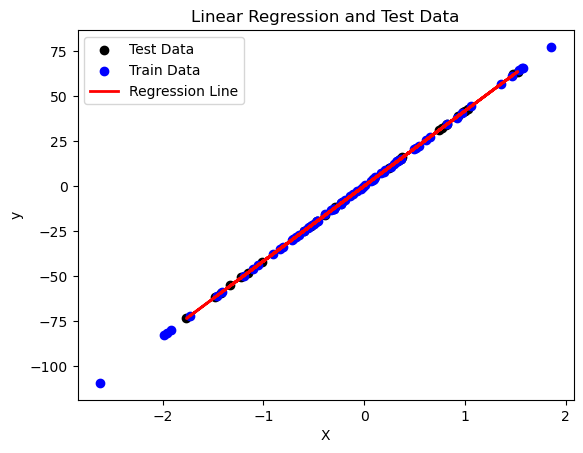

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=1, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]

    # Train the model on the training fold
    model.fit(X_train_kf, y_train_kf)

    # Predict on the validation fold
    y_pred_kf = model.predict(X_val_kf)

    # Calculate the evaluation metrics for the fold
    mse_scores.append(mean_squared_error(y_val_kf, y_pred_kf))
    r2_scores.append(r2_score(y_val_kf, y_pred_kf))

# Calculate the mean of the cross-validated scores
mean_mse_score = np.mean(mse_scores)
mean_r2_score = np.mean(r2_scores)

# Train the model on the entire training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Calculate the evaluation metrics for the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics for the test set
print("Mean Squared Error (test set):", mse_test)
print("R-squared (test set):", r2_test)

# Plot the original data points
plt.scatter(X_test, y_test, color='black', label='Test Data')
plt.scatter(X_train, y_train, color='blue', label='Train Data')

# Plot the regression line
y_regression_line = model.coef_ * X_test + model.intercept_
plt.plot(X_test, y_regression_line, color='red', linewidth=2, label='Regression Line')

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression and Test Data')
plt.legend()
plt.show()


In [23]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Calculate Mean Absolute Percentage Error (MAPE).
    :param y_true: Array of true values.
    :param y_pred: Array of predicted values.
    :return: MAPE value.
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the test set
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print("Mean Absolute Percentage Error (MAPE) for the test set: {:.2f}%".format(mape_test))

Mean Absolute Percentage Error (MAPE) for the test set: 0.78%


Random Forest 

Mean Squared Error: 955.7132206965955
R-squared: 0.8997897677679708


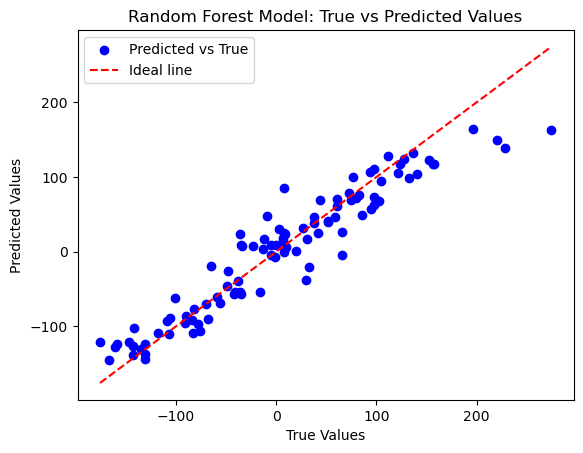

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=4, noise=0.2, random_state=42)

# Create a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calculate the mean squared error and R-squared for the predicted values
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the mean squared error and R-squared
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the results
plt.scatter(y, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Model: True vs Predicted Values')
plt.legend()
plt.show()


In [25]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Calculate Mean Absolute Percentage Error (MAPE).
    :param y_true: Array of true values.
    :param y_pred: Array of predicted values.
    :return: MAPE value.
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the predicted values
mape = mean_absolute_percentage_error(y, y_pred)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

Mean Absolute Percentage Error (MAPE): 171.88%


Gradient Boosting Regressor (GBM)

Mean Squared Error: 752.5593438639022


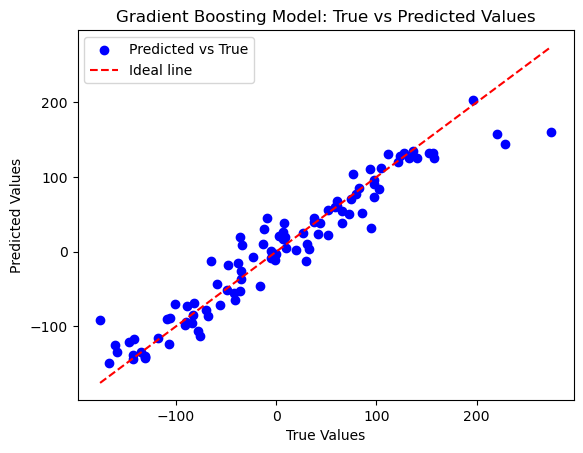

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=4, noise=0.2, random_state=42)

# Create a Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calculate the mean squared error for the predicted values
mse = mean_squared_error(y, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

# Plot the results
plt.scatter(y, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Model: True vs Predicted Values')
plt.legend()
plt.show()


In [27]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Calculate Mean Absolute Percentage Error (MAPE).
    :param y_true: Array of true values.
    :param y_pred: Array of predicted values.
    :return: MAPE value.
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the predicted values
mape = mean_absolute_percentage_error(y, y_pred)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 94.27%


K-Nearest Neighbors Regressor (KNN)

Cross-validated MSE scores:  [1139.21595577 2355.94756862 1329.47619009 1076.46212987 1936.45624984]
Mean cross-validated MSE score:  1567.5116188382822
Mean Squared Error: 801.575958524583


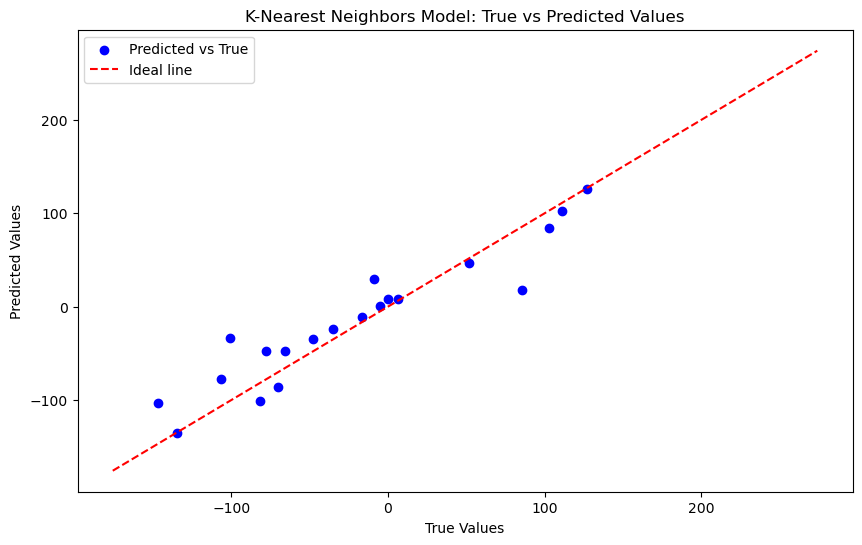

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=4, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a K-Nearest Neighbors Regressor
model = KNeighborsRegressor(n_neighbors=5)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_mse_scores = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Print the cross-validated MSE scores
print("Cross-validated MSE scores: ", cv_mse_scores)

# Calculate the mean of the cross-validated MSE scores
mean_cv_mse_score = np.mean(cv_mse_scores)

# Print the mean cross-validated MSE score
print("Mean cross-validated MSE score: ", mean_cv_mse_score)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('K-Nearest Neighbors Model: True vs Predicted Values')
plt.legend()
plt.show()


In [29]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Calculate Mean Absolute Percentage Error (MAPE).
    :param y_true: Array of true values.
    :param y_pred: Array of predicted values.
    :return: MAPE value.
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the test set
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 448.34%


XGboost Regressor

Mean Squared Error: 1062.8410686953107


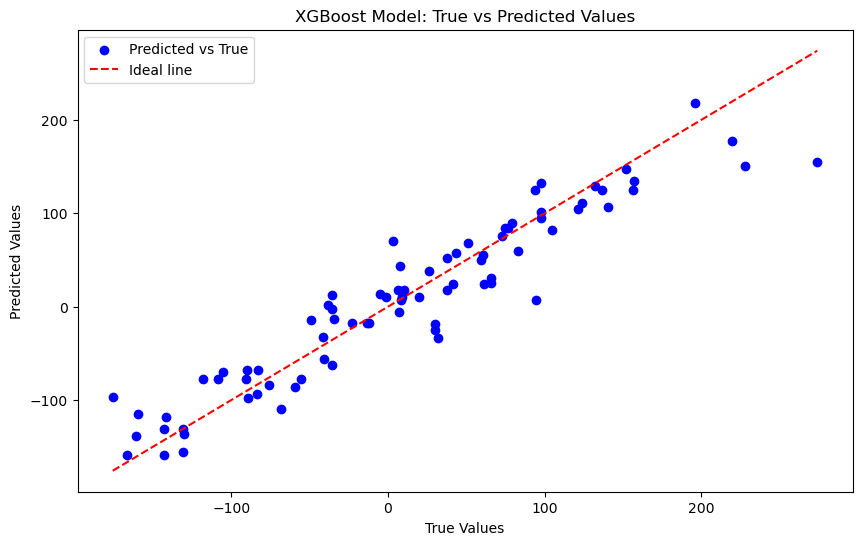

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=4, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Regressor
model = XGBRegressor()

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X_train, y_train, cv=kf)

# Calculate the mean squared error for the predicted values
mse = mean_squared_error(y_train, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Model: True vs Predicted Values')
plt.legend()
plt.show()


In [31]:
# Perform k-fold cross-validation and get the predicted values
y_pred_list = []
for train_index, test_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]

    model.fit(X_train_kf, y_train_kf)
    y_pred_kf = model.predict(X_val_kf)
    y_pred_list.extend(y_pred_kf)

y_pred = np.array(y_pred_list)

# Calculate MAPE for the predicted values
mape = mean_absolute_percentage_error(y_train, y_pred)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 410.55%


# BARBARA

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#### Load and Prepare the Data

In [ ]:
data = pd.read_csv('london_weekends.csv')

In [ ]:
data.head()

In [ ]:
data_encoded = pd.get_dummies(data, columns=['room_type', 'room_shared', 'room_private'], drop_first=True)

In [ ]:
data_encoded = pd.get_dummies(data, columns=['room_type'], drop_first=True)

In [ ]:
X = data.drop(['Unnamed: 0', 'host_is_superhost'], axis=1)
y = data['host_is_superhost']

X is a DataFrame containing features, excluding the 'Unnamed: 0' column and the target variable 'host_is_superhost'.

y is a Series containing the target variable 'host_is_superhost'.

#### Defining Categorical and Numerical Features¶

In [ ]:
categorical_features = ['room_type', 'room_shared', 'room_private']
numerical_features = ['realSum', 'person_capacity', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat']

Separating our features into categorical and numerical variables. This information is used for preprocessing.

#### Create Transformers for Preprocessing

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#### Split Data into Training and Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

#### Define Classifiers

In [ ]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}

#### One-hot encode categorical variables

In [ ]:

data_encoded = pd.get_dummies(data, columns=['room_type'], drop_first=True)

# Separate features and target variable
X = data_encoded.drop(['Unnamed: 0', 'host_is_superhost'], axis=1)
y = data_encoded['host_is_superhost']

# Define the classifier
clf = RandomForestClassifier()  # You can use any other classifier here

# Apply cross-validation
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean and standard deviation of the scores
print(f"Mean accuracy: {cv_scores.mean():.2f}")
print(f"Standard deviation: {cv_scores.std():.2f}")


### CONCATANED DATASET

In [ ]:
london_weekdays = pd.read_csv('london_weekdays.csv')
london_weekends = pd.read_csv('london_weekends.csv')

print(f"Shape of london_weekdays: {london_weekdays.shape}")
print(f"Shape of london_weekends: {london_weekends.shape}")

#### Add a new column to indicate the type of week

In [ ]:
london_weekdays['week Type'] = 'weekdays'
london_weekends['week Type'] = 'weekend'

In [ ]:
print(f"Columns of london_weekends: {london_weekends.columns}")

In [ ]:
# Concatenate the datasets
londonDt = pd.concat([london_weekdays, london_weekends]).copy()

In [ ]:
# Drop the initial index column
londonDt.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Check for missing values
print(londonDt.isnull().sum())

In [ ]:
londonDt

In [ ]:
londonDt['room_type'].value_counts()

In [ ]:
# Calculate mean price of each room type
roomtype_mean = londonDt.groupby('room_type')['realSum'].mean().reset_index().rename(columns={'realSum': 'Average Price'})

In [ ]:
# Count the number of each room type
roomtype_count = londonDt['room_type'].value_counts().reset_index().rename(columns={'index': 'roomType', 'room_type': 'count'})

In [ ]:
# Create a figure with two subplots
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 9))

# Plot the count of each room type
sns.barplot(data=roomtype_count, y='roomType', x='count', ax=ax[0], color='skyblue')
ax[0].set_title('Count of Each Room Type')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Room Type')

# Plot the mean price of each room type
sns.barplot(data=roomtype_mean, y='room_type', x='Average Price', ax=ax[1], color='coral')
ax[1].set_title('Average Price of Each Room Type')
ax[1].set_xlabel('Average Price (in $)')
ax[1].set_ylabel('Room Type')

# Increase font size of axis labels, title and tick labels
plt.rcParams.update({'font.size': 14})

# Remove gridlines
sns.despine()

# Display the mean price of each room type
print(roomtype_mean)
print(roomtype_count)

In [ ]:
import numpy as np
import scipy.stats as stats

dummy = londonDt[['room_type']]
dummy = pd.get_dummies(dummy)

sales_log = np.log(londonDt['realSum'].copy())

for i in dummy.columns:
    rho,pval = stats.spearmanr(dummy[i],sales_log )
    print(f'{i} coor with price = {rho}, p value = {pval}')

In [ ]:
londonDt.sort_values(by = ['lat', 'lng']).head(30)

In [ ]:
import plotly_express as px
fig = px.density_mapbox(londonDt, lat='lat', lon='lng',
                        z='realSum', radius=20,
                        center=dict(lat=londonDt.lat.mean(), 
                                    lon=londonDt.lng.mean()), 
                        zoom=10,
                        mapbox_style="open-street-map", 
                        height=600)
fig.show()

In [ ]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[londonDt.lat.mean(), 
                         londonDt.lng.mean()], 
               zoom_start=6, control_scale=True)

In [ ]:
map_values = londonDt[['lat','lng','realSum']]

data = map_values.values.tolist()

hm = HeatMap(data,
              min_opacity=0.05, 
              max_opacity=0.9, 
              radius=25).add_to(m)

In [ ]:
hm.save('output1.html')

In [ ]:
# What are the most popular week type?

In [ ]:
londonDt['week Type'].value_counts()

In [ ]:
fig = px.histogram(
    londonDt,
    x='week Type',
    text_auto=True,
    title='Number of listings by week Type',
    height=600
    )
fig.update_xaxes(
    categoryorder='total descending',
    tickangle=45
    )
fig.update_traces(textposition='outside')

fig.show()

### Significance relationship between room_type and realSum(aka. price)

In [ ]:
import numpy as np
from scipy.stats import f
import seaborn as sns
import matplotlib.pyplot as plt

# Extract groups based on room type
Group1 = londonDt[londonDt['room_type'] == 'Entire home/apt'][['realSum', 'room_type']]
Group2 = londonDt[londonDt['room_type'] == 'Private room'][['realSum', 'room_type']]
Group3 = londonDt[londonDt['room_type'] == 'Shared room'][['realSum', 'room_type']]

#### Calculate median absolute deviations (MAD) for each group

In [ ]:
Mad1 = np.median(np.abs(Group1['realSum'] - Group1['realSum'].median()))
Mad2 = np.median(np.abs(Group2['realSum'] - Group2['realSum'].median()))
Mad3 = np.median(np.abs(Group3['realSum'] - Group3['realSum'].median()))

In [ ]:
# Calculate mean MAD
meanMad = np.mean([Mad1, Mad2, Mad3])

# Calculate deviations from mean MAD for each group
dev1 = np.abs(Mad1 - meanMad)
dev2 = np.abs(Mad2 - meanMad)
dev3 = np.abs(Mad3 - meanMad)

# Calculate test statistic using Brown-Forsythe test
test_stat = (dev1 ** 2 + dev2 ** 2 + dev3 ** 2) / (2 * meanMad ** 2)

df1 = 2
df2 = 147

In [ ]:
# Calculate p-value using the F distribution
p_value = 1 - f.cdf(test_stat, df1, df2)

# Output test results
print("Brown-Forsythe test results:")
print("Test statistic: ", test_stat)
print("p-value: ", p_value)

# Check if p-value is less than 0.05
print(p_value < 0.05)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
# Set figure size and style
sns.set_style('white')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set color palette
colors = sns.color_palette('husl', 3)

# Plot each group on a separate subplot
for i, group in enumerate([Group1, Group2, Group3]):
    sns.histplot(data=group, x='realSum', color=colors[i], ax=ax[i], alpha=0.7,kde=True)
    ax[i].set_xlabel('Real Sum', fontsize=12)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_title(f'Group {i+1}', fontsize=14)

# Remove unnecessary spines and tick marks
sns.despine()
plt.tick_params(axis='both', which='both', length=0)

# Adjust the layout and spacing
plt.tight_layout(pad=1)

# Show the plot
plt.show()

In [ ]:
# Perform Kruskal-Wallis test
statistic, p_value = stats.kruskal(Group1['realSum'], Group2['realSum'], Group3['realSum'])

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis - there is no significant difference in the median values of the room type.")
else:
    print("Reject the null hypothesis - there is a significant difference in the median values of the room type.")

In [ ]:
# Clustering

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


Preparing the data

In [ ]:
X = londonDt.drop(['realSum','room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz', 'week Type'], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Determine the optimal number of clusters using Elbow method

In [ ]:
import matplotlib.pyplot as plt

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


Lookint for the "elbow point" on the graph, where the inertia starts to decrease at a slower rate it give us an indication of the optimal number of clusters. In this case, we will choose a value 5.

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
londonDt['cluster'] = kmeans.fit_predict(X_scaled)

Now, our DataFrame 'londonDt' will have an additional column 'cluster' indicating which cluster each data point belongs to.

We can analyze the characteristics of each cluster to understand how prices vary within each group.

In [ ]:
cluster_means = londonDt.groupby('cluster')['realSum'].mean()
cluster_counts = londonDt['cluster'].value_counts()

print(cluster_means)
print(cluster_counts)

Train a regression model for each cluster
Now that we have clustered the data, we can train separate regression models for each cluster to predict the prices.

In [ ]:
from sklearn.linear_model import LinearRegression

for cluster_id in londonDt['cluster'].unique():
    cluster_data = londonDt[londonDt['cluster'] == cluster_id]
    X_cluster = cluster_data.drop(['realSum', 'room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz', 'week Type', 'cluster'], axis=1)
    y_cluster = cluster_data['realSum']
    
    # Train a regression model
    model = LinearRegression()
    model.fit(X_cluster, y_cluster)

In [ ]:
X = londonDt.drop(['realSum', 'room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz', 'week Type'], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In this step, we're using both the Elbow method and Silhouette score to help identify the optimal number of clusters. The silhouette score measures how well-separated the clusters are, with higher values indicating better separation.

In [ ]:
from sklearn.metrics import silhouette_score

# Try a range of cluster numbers
clusters_range = range(2, 11)
inertia = []
silhouette_scores = []

for num_clusters in clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the Elbow graph and Silhouette score
fig, ax1 = plt.subplots()

ax1.plot(clusters_range, inertia, 'b-')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(clusters_range, silhouette_scores, 'r-')
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params('y', colors='r')

plt.title('Elbow Method with Silhouette Score')
plt.show()


In [ ]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
londonDt['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
cluster_means = londonDt.groupby('cluster')['realSum'].mean()
cluster_counts = londonDt['cluster'].value_counts()

print(cluster_means)
print(cluster_counts)

In [ ]:
from sklearn.linear_model import LinearRegression

for cluster_id in londonDt['cluster'].unique():
    cluster_data = londonDt[londonDt['cluster'] == cluster_id]
    X_cluster = cluster_data.drop(['realSum', 'room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz', 'week Type', 'cluster'], axis=1)
    y_cluster = cluster_data['realSum']
    
    # Train a regression model
    model = LinearRegression()
    model.fit(X_cluster, y_cluster)
    